###### Import Libraries and Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
matches = pd.read_csv('matches.csv')

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
matches.shape

(1095, 20)

In [ ]:
matches['team1'].value_counts()

team1
Royal Challengers Bangalore    135
Chennai Super Kings            128
Mumbai Indians                 123
Kolkata Knight Riders          121
Rajasthan Royals               101
Kings XI Punjab                 92
Sunrisers Hyderabad             86
Delhi Daredevils                85
Delhi Capitals                  41
Deccan Chargers                 39
Punjab Kings                    31
Lucknow Super Giants            23
Pune Warriors                   23
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [8]:
matches['team2'].value_counts()

team2
Mumbai Indians                 138
Kolkata Knight Riders          130
Rajasthan Royals               120
Chennai Super Kings            110
Royal Challengers Bangalore    105
Kings XI Punjab                 98
Sunrisers Hyderabad             96
Delhi Daredevils                76
Delhi Capitals                  50
Deccan Chargers                 36
Punjab Kings                    25
Gujarat Titans                  24
Pune Warriors                   23
Lucknow Super Giants            21
Gujarat Lions                   14
Rising Pune Supergiant           9
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Royal Challengers Bengaluru      6
Name: count, dtype: int64

###### Data Cleaning

In [ ]:
matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['team2'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['toss_winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

In [ ]:
matches['team1'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['team2'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['toss_winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)
matches['winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'},inplace=True)

In [ ]:
matches['team2'].value_counts()

team2
Mumbai Indians                 138
Kolkata Knight Riders          130
Rajasthan Royals               120
Royal Challengers Bangalore    111
Chennai Super Kings            110
Kings XI Punjab                 98
Sunrisers Hyderabad             96
Delhi Daredevils                76
Delhi Capitals                  50
Deccan Chargers                 36
Punjab Kings                    25
Gujarat Titans                  24
Pune Warriors                   23
Lucknow Super Giants            21
Rising Pune Supergiant          16
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [ ]:
matches['city'].isna().sum()

51

In [ ]:
matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [ ]:
matches['city'].fillna('Unknown',inplace=True)
matches['method'].fillna('Non D/L',inplace=True)

###### Success Rate of Teams

In [ ]:
def random_colors(no_of_colors):
    return ['#'+''.join([np.random.choice(list('0123456789ABCDEF')) for _ in range(6)]) for _ in range(no_of_colors)]

In [ ]:
random_colors(6)

['#6C5325', '#7C399D', '#D1DBC9', '#49BCC4', '#6042C7', '#6D2E30']

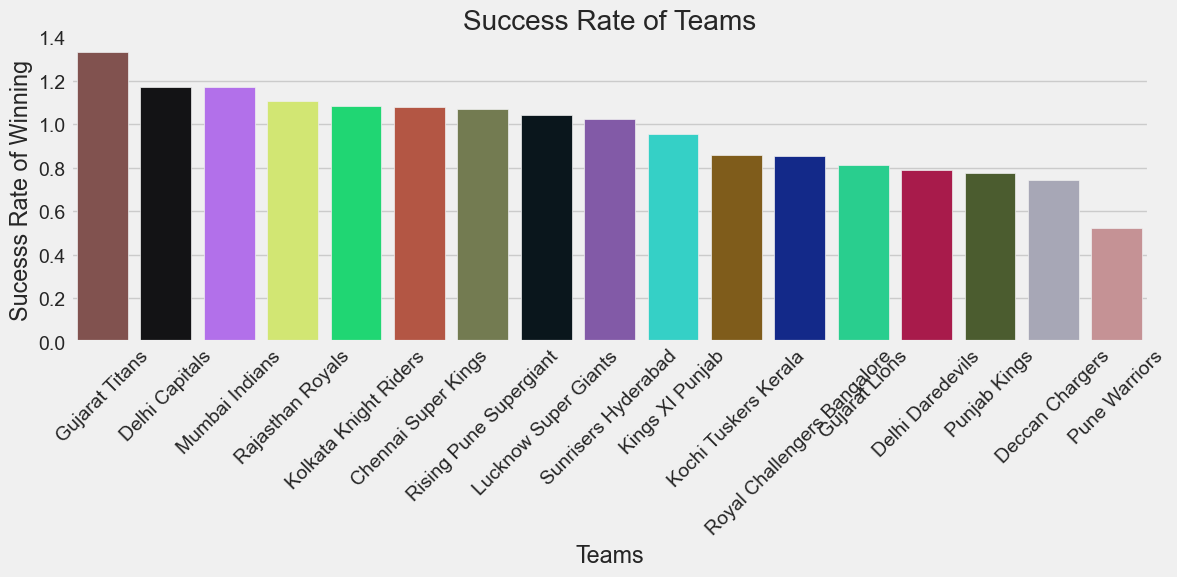

In [ ]:
success_ratio = matches.groupby('winner').count()['id']/matches.groupby('team1').count()['id']
success_ratio_desc = success_ratio.sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=success_ratio_desc.index,y=success_ratio_desc.values, palette=random_colors(len(success_ratio_desc)))
plt.title('Success Rate of Teams')
plt.xlabel('Teams')
plt.ylabel('Sucesss Rate of Winning')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

###### Most Titles Wins

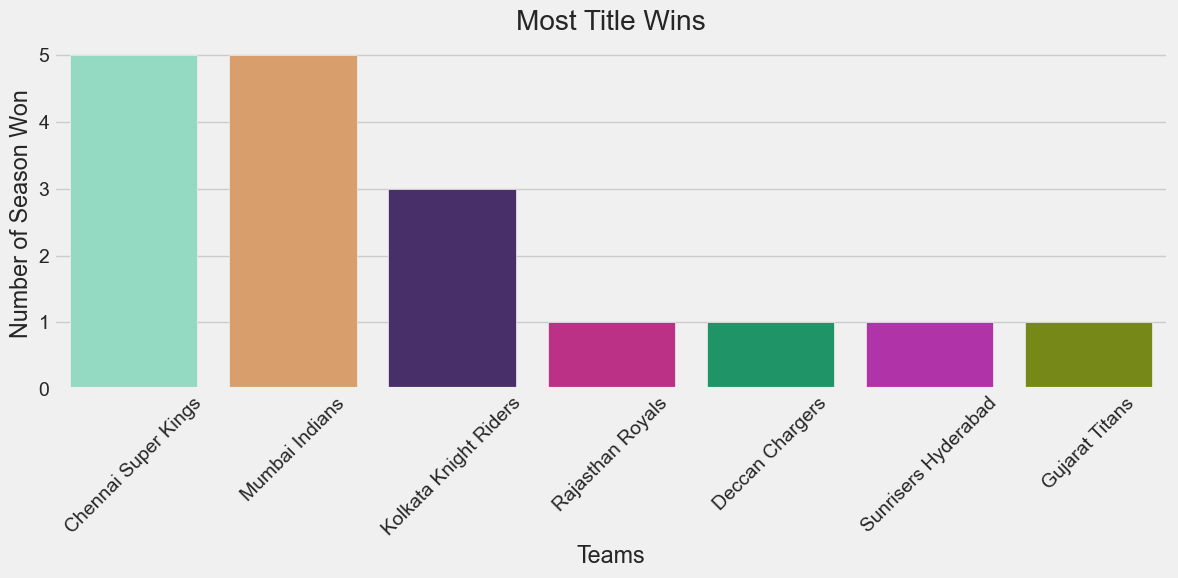

In [ ]:
winner_counts = matches.groupby('season')[['season','winner']].tail(1)['winner'].value_counts()


plt.figure(figsize=(12,6))
sns.barplot(x=winner_counts.index,y=winner_counts.values, palette=random_colors(len(winner_counts)))
plt.title('Most Title Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Season Won')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

###### Top 10 Players with Most Runs

###### Top 10 Best Performances in a Match

###### Top 10 Cities by Number of Matches

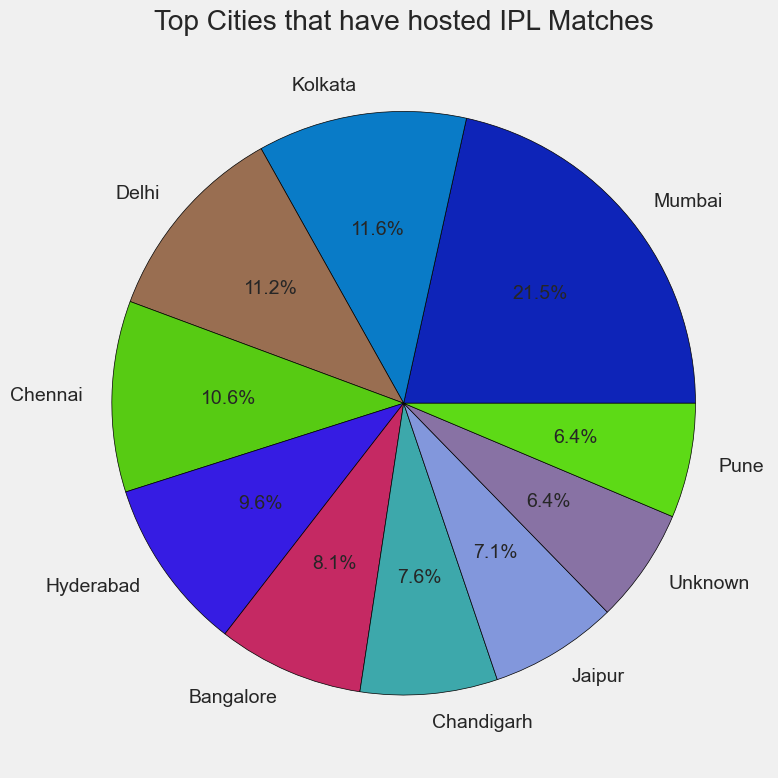

In [ ]:
top_cities = matches['city'].value_counts().reset_index(name='Match Count')[:10]

plt.figure(figsize=(8,8))
plt.pie(top_cities['Match Count'], labels = top_cities['city'],colors=random_colors(10),
       autopct='%1.1f%%', wedgeprops=dict(edgecolor='black'))
plt.title('Top Cities that have hosted IPL Matches')
plt.tight_layout()
plt.show()

###### Top 10 Best Fielders

###### Toss Decision

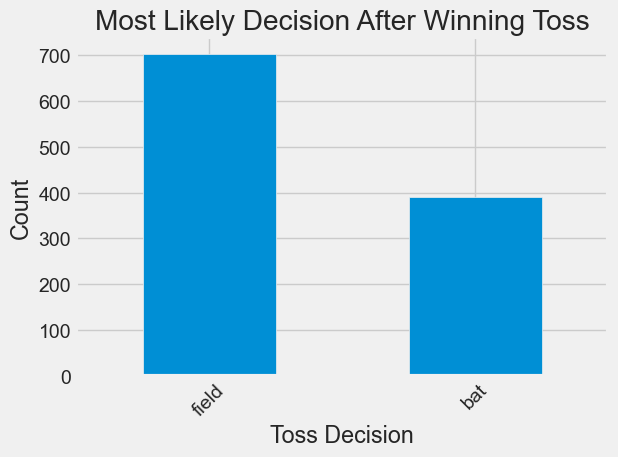

In [ ]:
matches['toss_decision'].value_counts().plot(kind='bar')
plt.title('Most Likely Decision After Winning Toss')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()